# Random Forest

Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv("Fraud_check.csv")
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [41]:
data.dtypes

Undergrad           int32
Marital.Status      int32
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban               int32
Taxable.Category    int32
dtype: object

In [42]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
595    False
596    False
597    False
598    False
599    False
Length: 600, dtype: bool

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
data.shape

(600, 6)

In [5]:
data.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [6]:
data['Taxable.Income'].describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: Taxable.Income, dtype: float64

<AxesSubplot:>

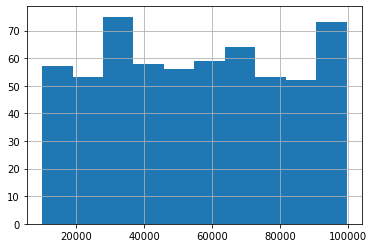

In [43]:
data['Taxable.Income'].hist()

# Converting taxable_income <= 30000 as "Risky" 

In [7]:
data['Taxable.Category'] = pd.cut(x = data['Taxable.Income'], bins = [10002,30000,99620], labels = ['Risky', 'Good'])
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable.Category
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


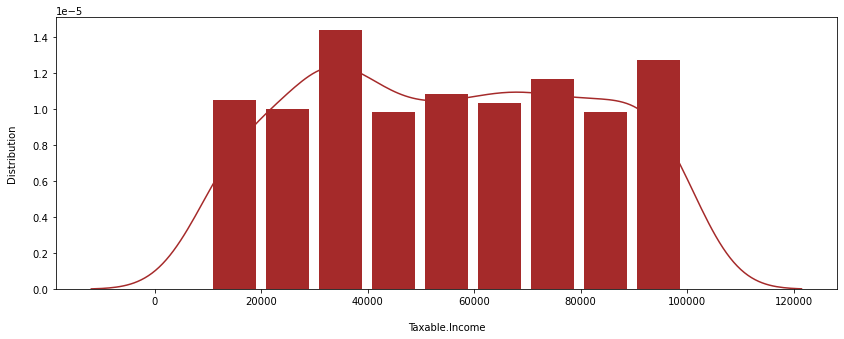

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
def distplot(param):
    plt.figure(figsize= (14,5))
    sns.distplot(data[param], color= "brown", hist_kws={"rwidth":0.80, 'alpha':1.0})
    plt.xlabel('\n'+param)
    plt.ylabel('Distribution\n')
    plt.show()
distplot("Taxable.Income")

In [9]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [10]:
categorical_features = data.describe(include=["object"]).columns
categorical_features

Index(['Undergrad', 'Marital.Status', 'Urban'], dtype='object')

In [11]:
numerical_features = data.describe(include=["int64"]).columns
numerical_features

Index(['Taxable.Income', 'City.Population', 'Work.Experience'], dtype='object')

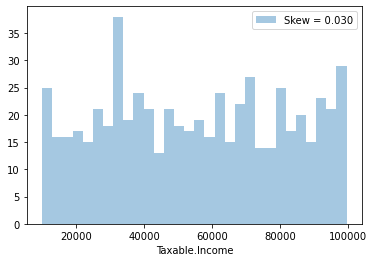

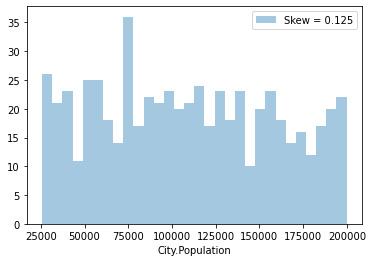

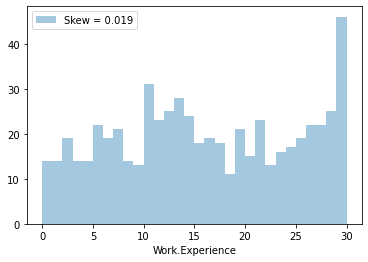

In [19]:
numerical_features=['Taxable.Income', 'City.Population', 'Work.Experience']
for feat in numerical_features:
    skew = data[feat].skew()
    sns.distplot(data[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

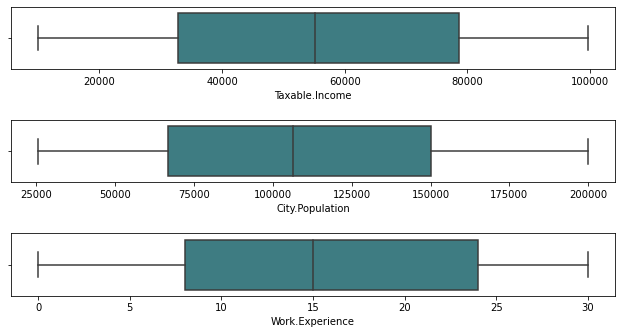

In [20]:
outlier = data.copy() 
fig, axes = plt.subplots(3,1,figsize=(9,5),sharex=False,sharey=False)
sns.boxplot(x='Taxable.Income',data= outlier,palette='crest',ax=axes[0])
sns.boxplot(x='City.Population',data= outlier,palette='crest',ax=axes[1])
sns.boxplot(x='Work.Experience',data= outlier,palette='crest',ax=axes[2])
plt.tight_layout(pad=2.0)

In [27]:
data.corr()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable.Category
Undergrad,1.000000,0.042407,-0.049232,0.079579,-0.005362,-0.000267,0.012523
Marital.Status,0.042407,1.000000,-0.012944,-0.001564,-0.002213,0.064562,0.006081
Taxable.Income,-0.049232,-0.012944,1.000000,-0.064387,-0.001818,0.070628,-0.688725
City.Population,0.079579,-0.001564,-0.064387,1.000000,0.013135,-0.040098,0.012225
Work.Experience,-0.005362,-0.002213,-0.001818,0.013135,1.000000,-0.094559,-0.001972
Urban,-0.000267,0.064562,0.070628,-0.040098,-0.094559,1.000000,0.004830
Taxable.Category,0.012523,0.006081,-0.688725,0.012225,-0.001972,0.004830,1.000000


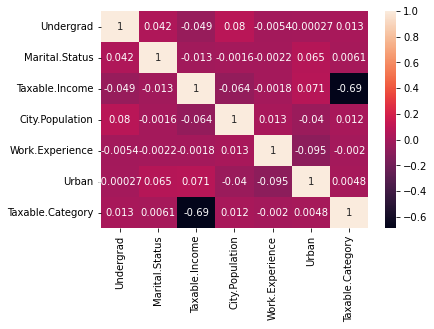

In [28]:
sns.heatmap(data.corr(), annot=True)
plt.show()

Index(['Undergrad', 'Marital.Status', 'Urban'], dtype='object')


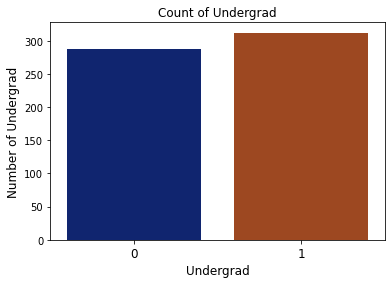

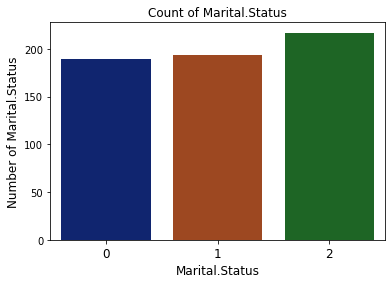

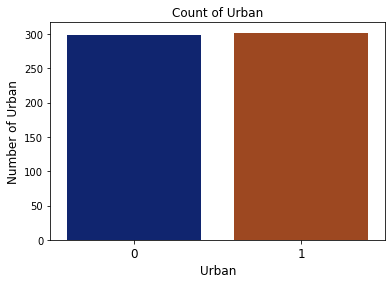

In [29]:
print(categorical_features)

for idx, column in enumerate(categorical_features):
    plt.figure(figsize=(6,4))
    unique = data[column].value_counts(ascending=True);
   
    plt.title("Count of "+ column)
    sns.countplot(data= data, x=column, palette = "dark")
    plt.xticks(rotation = 0, size = 12)
    
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Number of "+ column, fontsize=12)

In [22]:
le= preprocessing.LabelEncoder()
objlist = ['Undergrad','Marital.Status','Urban','Taxable.Category']
data[objlist] = data[objlist].apply(le.fit_transform)

In [23]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable.Category
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [34]:
fc = data[['Undergrad','Marital.Status','City.Population','Work.Experience','Urban','Taxable.Category']]

In [35]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable.Category, Length: 600, dtype: int32

# Building random forest classification

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [37]:
num_trees = 130
max_features = 2

model = RandomForestClassifier(n_estimators=num_trees,max_samples = 0.8,max_features=max_features, random_state = 8)
model.fit(x_train,y_train)
pred = model.predict(x_test)


In [38]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        26

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93        94
           1       0.88      0.54      0.67        26

    accuracy                           0.88       120
   macro avg       0.88      0.76      0.80       120
weighted avg       0.88      0.88      0.87       120

